In [166]:
%matplotlib inline
from pylab import *
import cv2

In [167]:
def straighten_image(image,corners=None):
    if corners is None:
        corners=find_corners(image)

    top_left, top_right, bottom_right, bottom_left=corners
    # Define the width and height of the new "top-down" view
    width = int(max(
        np.linalg.norm(bottom_right - bottom_left),
        np.linalg.norm(top_right - top_left)
    ))
    height = int(max(
        np.linalg.norm(top_right - bottom_right),
        np.linalg.norm(top_left - bottom_left)
    ))

    # Define the destination points for the perspective transform
    destination_corners = np.array([
        [0, 0],
        [width - 1, 0],
        [width - 1, height - 1],
        [0, height - 1]
    ], dtype="float32")

    # Compute the perspective transform matrix
    matrix = cv2.getPerspectiveTransform(corners, destination_corners)
    
    # Apply the perspective transformation
    warped_image = cv2.warpPerspective(image, matrix, (width, height))

    return warped_image


In [168]:
def get_board_squares_from_image(image,board_size,square_size=(60,60)):
    nr,nc=board_size
    
    squares=[]
    pix_row=image.shape[0]//nr
    pix_col=image.shape[1]//nc
    
    count=1
    for r in range(nr):
        for c in range(nc):
            subim=image[ pix_row*r:pix_row*(r+1),
                        pix_col*c:pix_col*(c+1),
                        :]
            subim=cv2.resize(subim,square_size)

            squares.append(subim)

    return squares

def find_corners(threshold_image):
    idx=where(threshold_image>126)
    points=[]
    for (i,j) in zip(idx[0],idx[1]):
        points.append((j,i))
    
    points=array(points)

    
    import scipy.spatial
    hull = scipy.spatial.ConvexHull(points)
    hull_points = points[hull.vertices]

    x=hull_points[:,0]
    y=hull_points[:,1]

    h,w=threshold_image.shape
    corners=[]    
    for x2,y2 in [ [0,0], [w,0],[w,h],[0,h]  ]:
        d=(x-x2)**2+(y-y2)**2
        idx=argmin(d)
    
        corners.append([x[idx],y[idx]])

    return array(corners,dtype=float32)

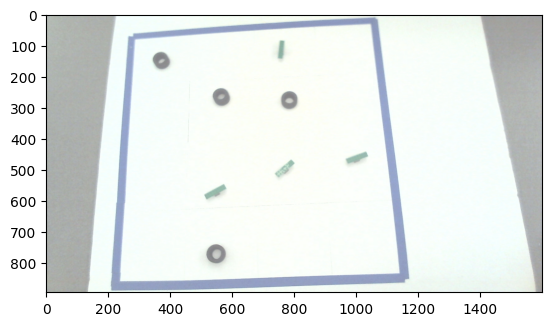

In [179]:
#image=imread('images/test/snapshot_50.jpg')
image=imread('images/test/GameState3.jpg')
imshow(image)

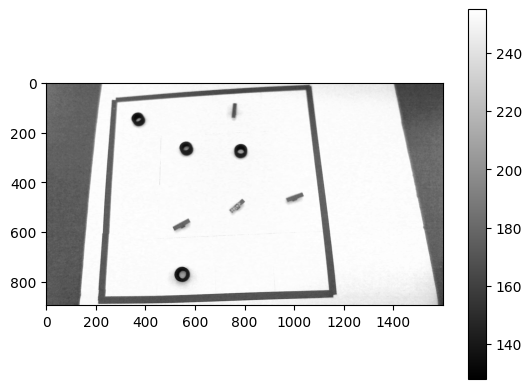

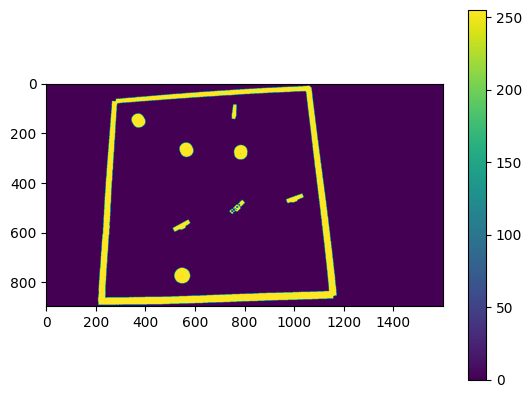

In [195]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
h, w = image.shape[:2]
threshold_im=((gray<210)*255).astype(np.uint8)

figure()
imshow(gray,cmap=cm.gray)
colorbar()


# fill in the side parts that are off the grid
val=0
cv2.floodFill(threshold_im,None,(0,0),val)
cv2.floodFill(threshold_im,None,(w-1,0),val)
cv2.floodFill(threshold_im,None,(w-1,h-1),val)
cv2.floodFill(threshold_im,None,(0,h-1),val)   

figure()
imshow(threshold_im)
colorbar()


In [196]:
def find_corners(threshold_image):
    idx=where(threshold_image>126)
    points=[]
    for (i,j) in zip(idx[0],idx[1]):
        points.append((j,i))
    
    points=array(points)

    
    import scipy.spatial
    hull = scipy.spatial.ConvexHull(points)
    hull_points = points[hull.vertices]

    x=hull_points[:,0]
    y=hull_points[:,1]

    h,w=threshold_image.shape
    corners=[]    
    for x2,y2 in [ [0,0], [w,0],[w,h],[0,h]  ]:
        d=(x-x2)**2+(y-y2)**2
        idx=argmin(d)
    
        corners.append([x[idx],y[idx]])

    return array(corners,dtype=float32)

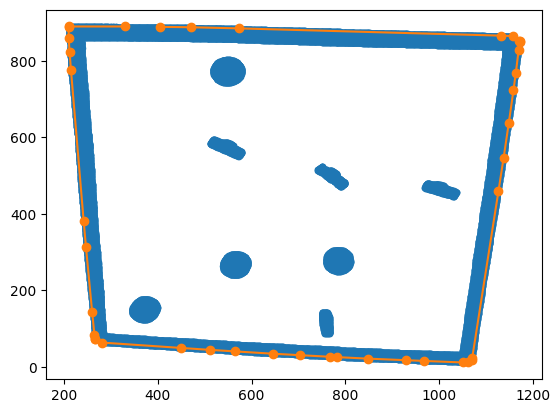

In [197]:
idx=where(threshold_im>126)
points=[]
for (i,j) in zip(idx[0],idx[1]):
    points.append((j,i))

points=array(points)
xp=points[:,0]
yp=points[:,1]

import scipy.spatial
hull = scipy.spatial.ConvexHull(points)
hull_points = points[hull.vertices]

x=hull_points[:,0]
y=hull_points[:,1]


plot(xp,yp,'.')
plot(x,y,'o-')

array([[ 266.,   73.],
       [1070.,   22.],
       [1171.,  851.],
       [ 210.,  888.]], dtype=float32)

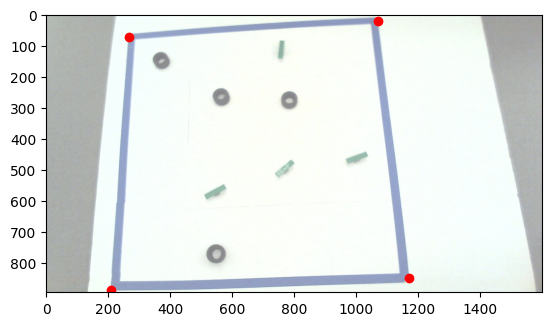

In [198]:
corners=find_corners(threshold_im)

imshow(image)
#plot(points[:,0],points[:,1],'.')
# first column = x, second column=y  (could easily have been row,col)
plot(corners[:,0],corners[:,1],'ro')
corners

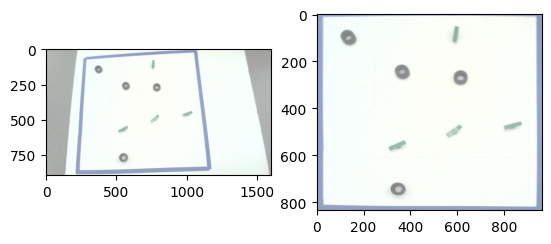

In [199]:
im3=straighten_image(image,corners)

subplot(1,2,1)
imshow(image)

subplot(1,2,2)
imshow(im3)

In [200]:
from Game import Board

In [201]:
state=Board('1020/0110/0222/0200')

In [202]:
squares=get_board_squares_from_image(im3,state.shape)

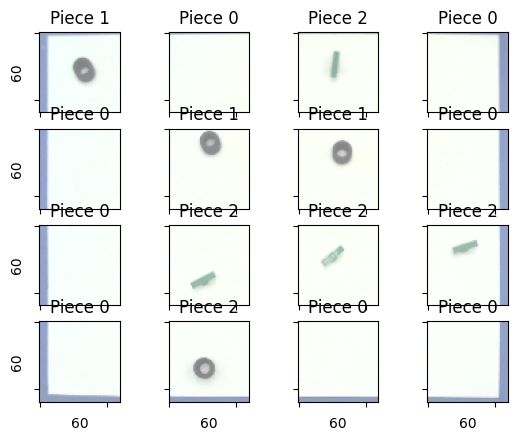

In [203]:
nr,nc=state.shape
saveit=False

count=0
for r in range(nr):
    for c in range(nc):

        subplot(nr,nc,count+1)
        imshow(squares[count])

        shape=squares[count].shape
        piece=state.board[count]
        
        title(f"Piece {piece}")
        if c==0:
            ylabel(shape[0])

        if r==nr-1:
            xlabel(shape[1])
        gca().set_xticklabels([])
        gca().set_yticklabels([])


        if saveit:
            fname=f"images/square{r}_{c}_{piece}.jpg"
            print(fname)
            imsave(fname,squares[count])
        



        
        count+=1        

